# **CUSTOMER CHURN PREDICTION**
*CUSTOMER CHURN PREDICTION IS ONE OF THE VERY IMPORTANT TASKS FOR ANY KIND OF BUSINESS. IT IS THE MEASURE OF CUSTOMERS LEAVING YOUR BUSINESS AND IF NOT STUDIED PROPERLY IT CAN PUT YOU OUT OF BUSINESS.*

Dataset - https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree, export_text
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, f1_score
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/churn_data.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1343,7690-KPNCU,Male,0,Yes,Yes,64,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),73.05,4688.65,No
1809,9606-PBKBQ,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.00,2642.05,Yes
320,5020-ZSTTY,Female,1,No,No,54,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Bank transfer (automatic),82.45,4350.1,Yes
995,3842-IYKUE,Female,0,No,No,35,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),85.30,2917.5,Yes
2779,2691-NZETQ,Male,0,No,No,9,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.35,758.6,Yes


In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df[df.TotalCharges==' '].shape

(11, 21)

In [ ]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 21)

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df1.drop('customerID',axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df1['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


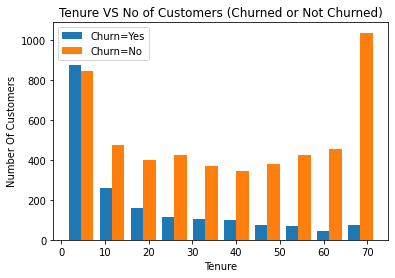

In [ ]:
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Tenure VS No of Customers (Churned or Not Churned)")
plt.hist([df1[df1.Churn=='Yes'].tenure,df1[df1.Churn=='No'].tenure],label=['Churn=Yes','Churn=No'])
plt.legend();

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


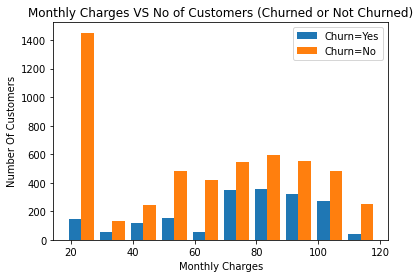

In [ ]:
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Monthly Charges VS No of Customers (Churned or Not Churned)")
plt.hist([df1[df1.Churn=='Yes'].MonthlyCharges,df1[df1.Churn=='No'].MonthlyCharges],label=['Churn=Yes','Churn=No'])
plt.legend();

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


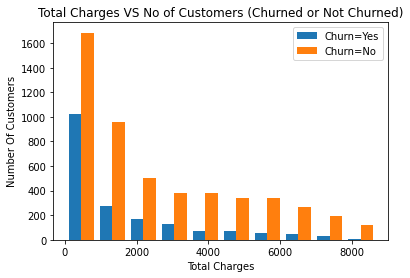

In [ ]:
plt.xlabel("Total Charges")
plt.ylabel("Number Of Customers")
plt.title("Total Charges VS No of Customers (Churned or Not Churned)")
plt.hist([df1[df1.Churn=='Yes'].TotalCharges,df1[df1.Churn=='No'].TotalCharges],label=['Churn=Yes','Churn=No'])
plt.legend();

In [ ]:
df1.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3502,1,0,0,0,0.605634,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4204,1,1,0,0,0.056338,1,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2458,1,1,1,0,0.690141,1,1,1,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6762,1,0,0,0,0.478873,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def print_unique_col_values(df):
    lst = []
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')
            lst.append([column]+list(df1[column].unique()))
    return lst

In [ ]:
a = print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
print(a)

[['gender', 'Female', 'Male'], ['Partner', 'Yes', 'No'], ['Dependents', 'No', 'Yes'], ['PhoneService', 'No', 'Yes'], ['MultipleLines', 'No phone service', 'No', 'Yes'], ['InternetService', 'DSL', 'Fiber optic', 'No'], ['OnlineSecurity', 'No', 'Yes', 'No internet service'], ['OnlineBackup', 'Yes', 'No', 'No internet service'], ['DeviceProtection', 'No', 'Yes', 'No internet service'], ['TechSupport', 'No', 'Yes', 'No internet service'], ['StreamingTV', 'No', 'Yes', 'No internet service'], ['StreamingMovies', 'No', 'Yes', 'No internet service'], ['Contract', 'Month-to-month', 'One year', 'Two year'], ['PaperlessBilling', 'Yes', 'No'], ['PaymentMethod', 'Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], ['Churn', 'No', 'Yes']]


In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
lst_a = print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
lst_a

[['gender', 'Female', 'Male'],
 ['Partner', 'Yes', 'No'],
 ['Dependents', 'No', 'Yes'],
 ['PhoneService', 'No', 'Yes'],
 ['MultipleLines', 'No', 'Yes'],
 ['InternetService', 'DSL', 'Fiber optic', 'No'],
 ['OnlineSecurity', 'No', 'Yes'],
 ['OnlineBackup', 'Yes', 'No'],
 ['DeviceProtection', 'No', 'Yes'],
 ['TechSupport', 'No', 'Yes'],
 ['StreamingTV', 'No', 'Yes'],
 ['StreamingMovies', 'No', 'Yes'],
 ['Contract', 'Month-to-month', 'One year', 'Two year'],
 ['PaperlessBilling', 'Yes', 'No'],
 ['PaymentMethod',
  'Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 ['Churn', 'No', 'Yes']]

In [ ]:
for cols in lst_a:
    if len(cols)==3:
        df1[cols[0]].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2547,Female,0,0,0,52,0,0,DSL,1,1,0,1,0,0,Two year,0,Mailed check,39.10,1982.1,0
6054,Female,0,1,1,36,1,1,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Bank transfer (automatic),97.35,3457.9,1


In [ ]:
enc_cols = ['InternetService', 'Contract', 'PaymentMethod']

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore')

encoder.fit(df1[enc_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(enc_cols))
encoded_cols

['InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [ ]:
df1[encoded_cols] = encoder.transform(df1[enc_cols])
df1.sample(10)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1858,Female,0,1,0,19,1,0,Fiber optic,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4076,Male,0,1,0,70,1,1,Fiber optic,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6800,Female,0,1,0,14,1,0,Fiber optic,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6982,Female,0,1,1,72,1,0,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4697,Male,0,1,0,72,1,0,Fiber optic,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3573,Female,0,1,1,28,1,0,No,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1915,Male,0,0,0,24,1,0,DSL,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
304,Male,0,0,1,38,1,1,Fiber optic,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4075,Male,0,0,0,53,0,0,DSL,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1527,Male,0,1,1,72,1,0,No,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
df1 = df1.drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1)

In [ ]:
df1.replace('Male', 1 ,inplace=True)
df1.replace('Female', 0 ,inplace=True)

In [ ]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6875,0,0,1,0,64,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5705,1,0,0,0,1,1,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
scl_cols = ['tenure', 'TotalCharges', 'MonthlyCharges']

In [ ]:
scaler = MinMaxScaler()

#FITTING THE DATA INTO THE SCALER
scaler.fit(df1[scl_cols])

#TRANSFORMING THE SCALED DATA INTO THE NUMERIC COLUMNS
df1[scl_cols] = scaler.transform(df1[scl_cols])

In [ ]:
input_cols = list(df1.columns)
input_cols.remove('Churn')
input_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [ ]:
target_col = 'Churn'

In [ ]:
inputs = df1[input_cols]
target = df1[target_col].values

In [ ]:
df1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3911,1,0,0,0,0.239437,1,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1240,1,0,0,0,0.338028,1,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


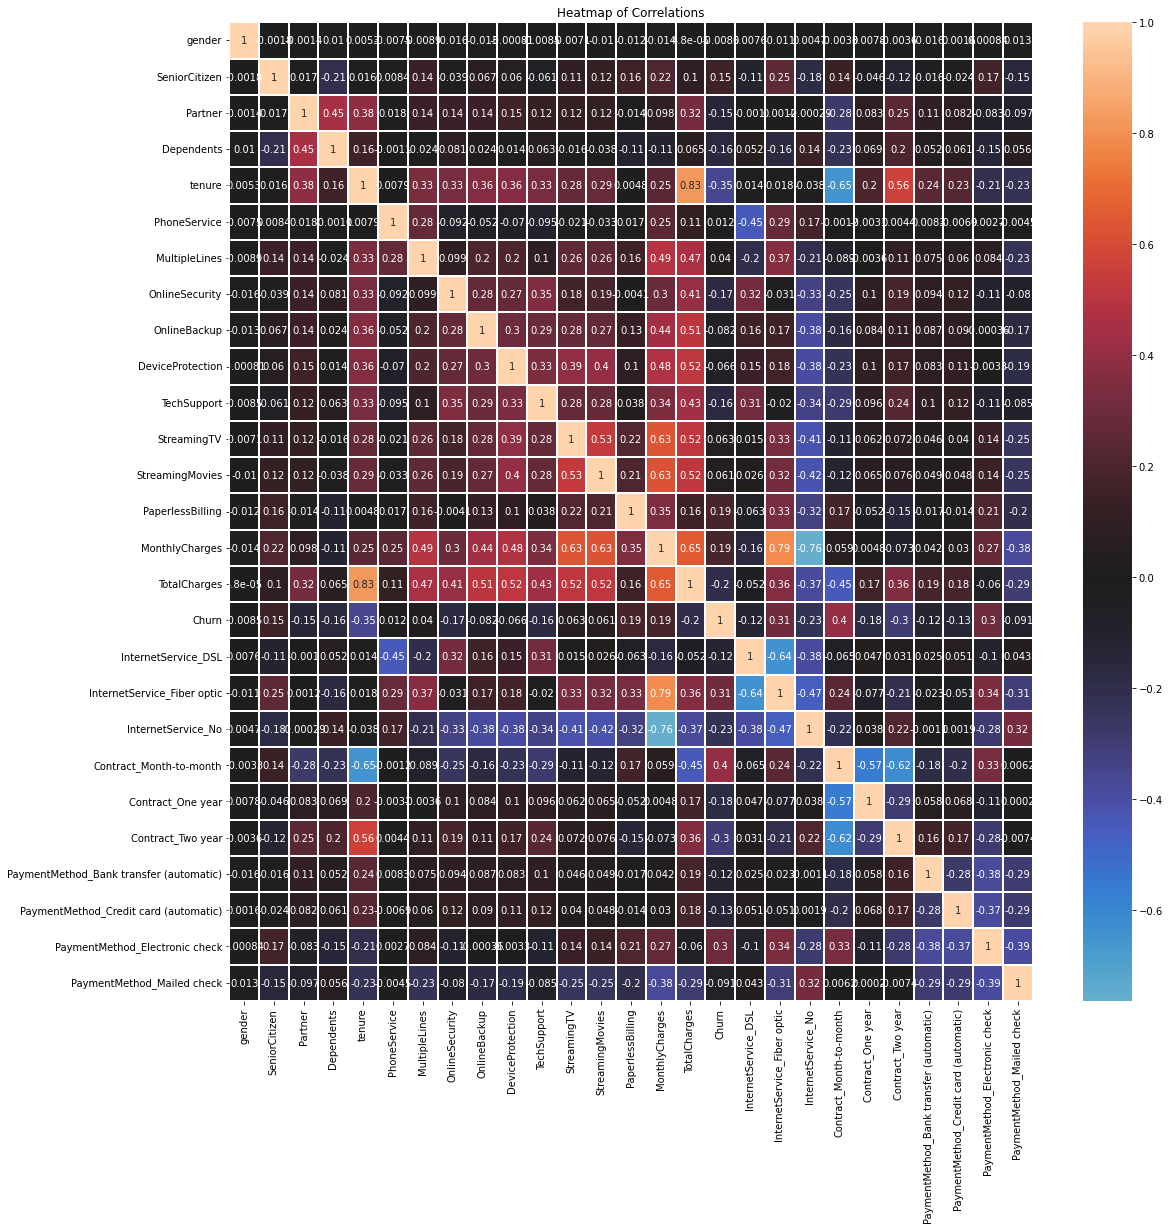

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(), center=0, annot=True, linewidths=1);
plt.title('Heatmap of Correlations');

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.15,random_state=5)

**PYTORCH TABULAR**

https://pytorch-tabular.readthedocs.io/en/latest/

In [ ]:
pip install pytorch_tabular[all]

In [ ]:
 pip install pytorch_tabular


In [ ]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data_config = DataConfig(
    target=['Churn'], #target should always be a list. Multi-targets are only supported for regression. Multi-Task Classification is not implemented
    continuous_cols=num_col_names,
    categorical_cols=cat_col_names,
)
trainer_config = TrainerConfig(
    auto_lr_find=True, # Runs the LRFinder to automatically derive a learning rate
    batch_size=150,
    max_epochs=100,
    gpus=1, #index of the GPU to use. -1 means all available GPUs, None, means CPU
)
optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="1024-512-512",  # Number of nodes in each layer
    activation="LeakyReLU", # Activation between each layers
    learning_rate = 1e-5
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

In [ ]:
tabular_model.fit(train=train, validation=val)


Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 138   
1 | normalizing_batch_norm | BatchNorm1d         | 6     
2 | backbone               | FeedForwardBackbone | 838 K 
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
839 K     Trainable params
0         Non-trainable params
839 K     Total params
3.359     Total estimated model params size (MB)
Global seed set to 42


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------


LR finder stopped early after 98 steps due to diverging loss.
Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt
Learning rate set to 0.0009120108393559097
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | embedding_layers       | ModuleList          | 138   
1 | normalizing_batch_norm | BatchNorm1d         | 6     
2 | backbone               | FeedForwardBackbone | 838 K 
3 | output_layer           | Linear              | 1.0 K 
4 | loss                   | CrossEntropyLoss    | 0     
---------------------------------------------------------------
839 K     Trainable params
0         Non-trainable params
839 K     Total params
3.359     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 21it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
result = tabular_model.evaluate(test)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_accuracy': 0.7874911427497864}
--------------------------------------------------------------------------------


In [ ]:
pred_df = tabular_model.predict(test)
pred_df.head()


Generating Predictions...:   0%|          | 0/10 [00:00<?, ?it/s]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,0_probability,1_probability,prediction
6053,0,0,0,1,0.591549,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.686135,0.313864,0
2456,1,0,1,1,0.647887,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.838288,0.161712,0
6421,0,0,0,0,0.281690,1,0,1,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.729598,0.270402,0
5668,0,1,1,0,0.535211,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.550855,0.449145,0
2854,1,0,1,1,0.225352,1,1,1,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.689640,0.310360,0
